In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


['C:\\Users\\YuHan\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothicLight.ttf', 'C:\\Windows\\Fonts\\SitkaVF-Italic.ttf', 'C:\\Windows\\Fonts\\SegoeIcons.ttf', 'C:\\Users\\YuHan\\AppData\\Local\\Microsoft\\Windows\\Fonts\\FiraCodeNerdFontMono-Light.ttf', 'C:\\Users\\YuHan\\AppData\\Local\\Microsoft\\Windows\\Fonts\\FiraCodeNerdFontMono-Medium.ttf', 'C:\\Windows\\Fonts\\LeelUIsl.ttf', 'C:\\Windows\\Fonts\\constan.ttf', 'C:\\Windows\\Fonts\\verdanai.ttf', 'C:\\Users\\YuHan\\AppData\\Local\\Microsoft\\Windows\\Fonts\\FiraCodeNerdFont-SemiBold.ttf', 'C:\\Users\\YuHan\\AppData\\Local\\Microsoft\\Windows\\Fonts\\FiraCodeNerdFontPropo-Bold.ttf', 'C:\\Windows\\Fonts\\monbaiti.ttf', 'C:\\Windows\\Fonts\\comicz.ttf', 'C:\\Windows\\Fonts\\msjhbd.ttc', 'C:\\Windows\\Fonts\\Candarali.ttf', 'C:\\Windows\\Fonts\\trebucbd.ttf', 'C:\\Users\\YuHan\\AppData\\Local\\Microsoft\\Windows\\Fonts\\FiraCodeNerdFont-Medium.ttf', 'C:\\Windows\\Fonts\\segoesc.ttf', 'C:\\Windows\\Fonts\\ntailub.ttf', 'C:\\Win

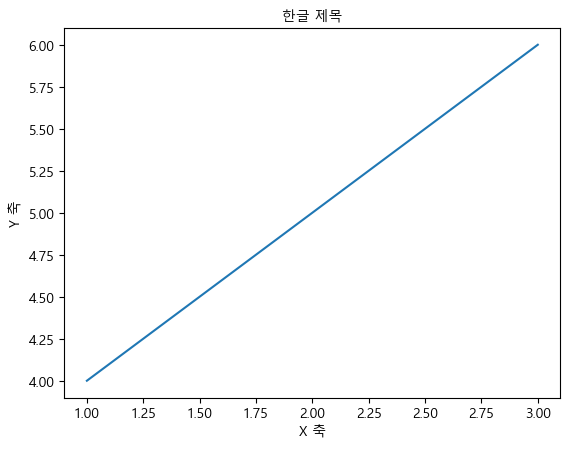

In [4]:
import matplotlib.font_manager as fm


# 나눔 폰트 경로 설정 (폰트를 설치한 위치를 확인하여 경로를 수정)
font_path = 'C:/Windows/Fonts/malgun.ttf'

# 폰트 설정
fontprop = fm.FontProperties(fname=font_path, size=10)

# matplotlib에 폰트 설정
plt.rc('font', family=fontprop.get_name())

# 폰트 설정 확인
print(fm.findSystemFonts(fontpaths=None, fontext='ttf'))

# 한글 텍스트가 포함된 예제 플롯
plt.figure()
plt.plot([1, 2, 3], [4, 5, 6])
plt.title('한글 제목', fontproperties=fontprop)
plt.xlabel('X 축', fontproperties=fontprop)
plt.ylabel('Y 축', fontproperties=fontprop)
plt.show()

In [5]:
df = pd.read_csv("movie_finished_toFDA_V9.csv", encoding='utf-8')
teaser = pd.read_excel("./trailer_data/예고편 영상 데이터.xlsx")

In [6]:
# df랑 teaser 합쳐야하는데 movie_title을 기준으로 merge 해주고 df에 새로운 컬럼으로 teaser 중에 view_count 피쳐만 추가해주면 됨
merged_df = pd.merge(df, teaser[['movie_title', 'view_count']], on='movie_title', how='left')

# 결과 확인
print(merged_df.head())

   naver_movie_code  kobis_movie_code movie_title release_date DoW_release  \
0            107374          20142641   나를 잊지 말아요   2016-01-07    Thursday   
1            107374          20142641   나를 잊지 말아요   2016-01-07    Thursday   
2            107374          20142641   나를 잊지 말아요   2016-01-07    Thursday   
3            107374          20142641   나를 잊지 말아요   2016-01-07    Thursday   
4            107374          20142641   나를 잊지 말아요   2016-01-07    Thursday   

         Date       DoW      MoY  D_D  DailyTotal  ...  국적평균스크린수  등급평균관객수  \
0  2016-01-07  Thursday  January    0         612  ...        95     9090   
1  2016-01-08    Friday  January    1         332  ...        95     9090   
2  2016-01-09  Saturday  January    2         394  ...        95     9090   
3  2016-01-10    Sunday  January    3         205  ...        95     9090   
4  2016-01-11    Monday  January    4         246  ...        95     9090   

   등급평균누적관람객수  등급평균스크린수  7days_before  5days_before  Day_of_release 

In [7]:
# D_D가 0인 데이터 추출
dd_zero_df = merged_df[merged_df['D_D'] == 0]

features = ['movie_title', '감독군', 'actor_power', '장르평균관객수', '배급사군', 'running_time', 'view_count']

# features만 dd_zero_df에서 남겨줘
dd_zero_df = dd_zero_df[features]
dd_zero_df

,movie_title,감독군,actor_power,장르평균관객수,배급사군,running_time,view_count
0,나를 잊지 말아요,3.0,6.820599e+07,2630,3,106,97217.0
15,짱구는 못말려 극장판: 나의 이사 이야기 선인장 대습격,2.0,2.885534e+05,4923,3,103,3904.0
30,굿 다이노,4.0,2.128681e+07,11603,3,100,382486.0
45,그날의 분위기,4.0,6.508373e+07,2630,3,103,33793.0
60,레버넌트: 죽음에서 돌아온 자,4.0,1.110780e+07,12651,3,156,770908.0
...,...,...,...,...,...,...,...
6060,롱 리브 더 킹: 목포 영웅,5.0,1.730933e+07,13993,3,117,879907.0
6075,토이 스토리 4,5.0,2.208432e+06,11603,3,99,2216861.0
6090,비스트,1.0,6.513518e+06,15754,3,130,344266.0
6105,존 윅 3: 파라벨룸,3.0,1.668309e+05,17735,2,131,239913.0


In [8]:
import seaborn as sns

# 시각화 스타일 지정(선택사항)
sns.set_style('whitegrid')
# 예제 데이터셋 로드: tips 데이터
tips = sns.load_dataset('tips')

In [9]:
df = dd_zero_df

# 2. 데이터 구조 확인 (Shape, Dtype, Head)


In [10]:
# 데이터 형태(행, 열) 확인
print("데이터 Shape:", df.shape)

# 상위 5행 확인
print("\n상위 5개 샘플:")
print(df.head())

# 컬럼별 데이터 타입 및 기본 정보 확인
print("\n데이터 정보:")
print(df.info())

# 컬럼별 기술 통계량 확인 (수치형 변수)
print("\n기술 통계량:")
print(df.describe())


데이터 Shape: (409, 7)

상위 5개 샘플:
                       movie_title  감독군   actor_power  장르평균관객수  배급사군  \
0                        나를 잊지 말아요  3.0  6.820599e+07     2630     3   
15  짱구는 못말려 극장판: 나의 이사 이야기 선인장 대습격  2.0  2.885534e+05     4923     3   
30                           굿 다이노  4.0  2.128681e+07    11603     3   
45                         그날의 분위기  4.0  6.508373e+07     2630     3   
60                레버넌트: 죽음에서 돌아온 자  4.0  1.110780e+07    12651     3   

    running_time  view_count  
0            106     97217.0  
15           103      3904.0  
30           100    382486.0  
45           103     33793.0  
60           156    770908.0  

데이터 정보:
<class 'pandas.core.frame.DataFrame'>
Index: 409 entries, 0 to 6120
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_title   409 non-null    object 
 1   감독군           408 non-null    float64
 2   actor_power   409 non-null    float64
 3   장르평균관객수       409 non

# 3. 결측치(Missing Value) 확인 및 처리



결측치 개수:
movie_title     0
감독군             1
actor_power     0
장르평균관객수         0
배급사군            0
running_time    0
view_count      4
dtype: int64


c:\Users\YuHan\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\YuHan\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 46021 (\N{HANGUL SYLLABLE DOG}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\YuHan\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 44400 (\N{HANGUL SYLLABLE GUN}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\YuHan\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\YuHan\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 47476 (\N{HANGUL SYLLABLE REU}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\YuHan\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\YuHan\ana

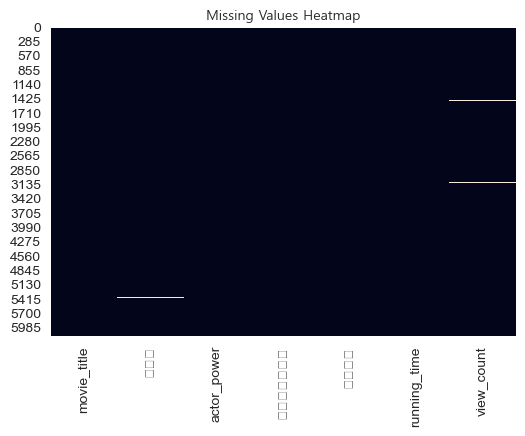

In [11]:
# 결측치 개수 확인
print("\n결측치 개수:")
print(df.isnull().sum())

# 결측치 시각화 (seaborn의 heatmap 이용, 결측여부 파악)
plt.figure(figsize=(6,4))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap", fontproperties=fontprop)
plt.show()




평균값으로 대체

In [12]:
# 평균값으로 대체
if df['view_count'].isnull().sum() > 0:
    mean_val = df['view_count'].mean()
    df['view_count'].fillna(mean_val, inplace=True)
    
if df['감독군'].isnull().sum() > 0:
    mean_val = df['감독군'].mean()
    df['감독군'].fillna(mean_val, inplace=True)

# 4. 분포도 확인


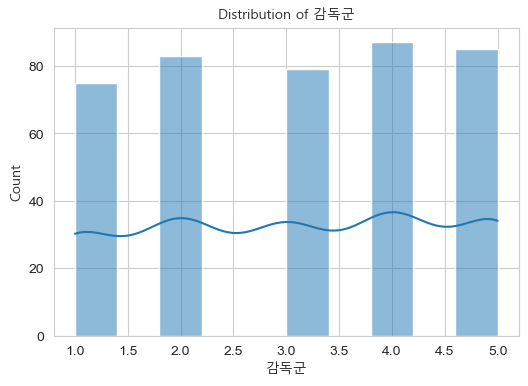

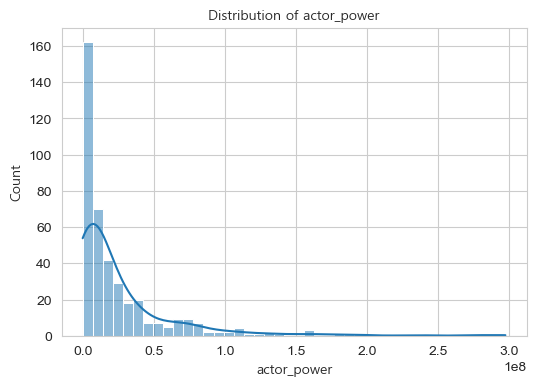

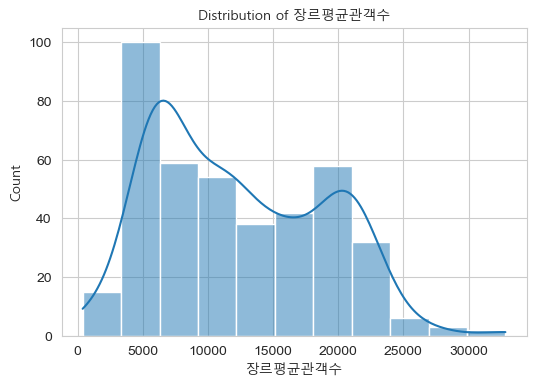

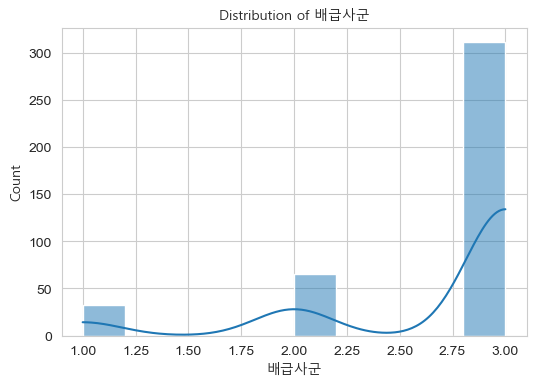

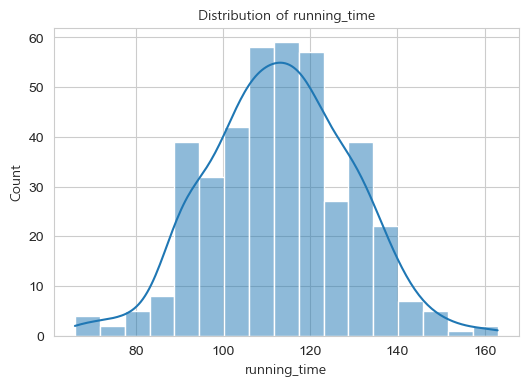

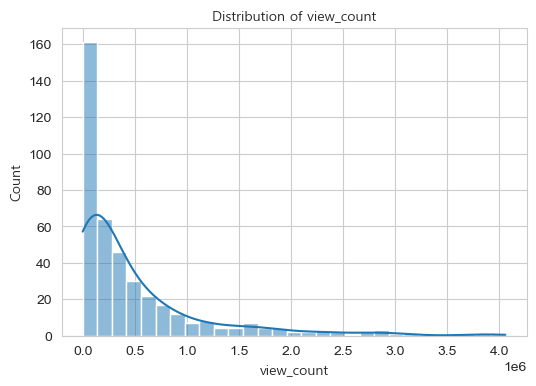

In [13]:
# numeric_cols: movie_title을 제외한 수치형 컬럼들 선택
numeric_cols = ['감독군', 'actor_power', '장르평균관객수', '배급사군', 'running_time', 'view_count']

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}',fontproperties=fontprop)
    plt.xlabel(col, fontproperties=fontprop)
    plt.ylabel('Count', fontproperties=fontprop)
    plt.show()


박스플롯

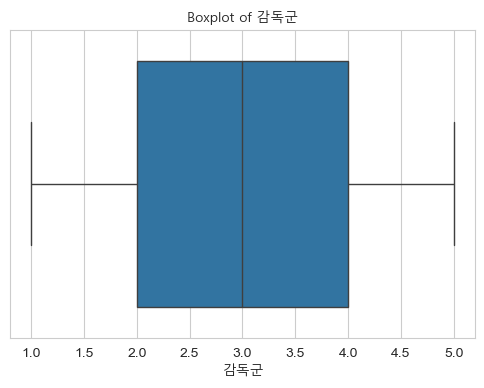

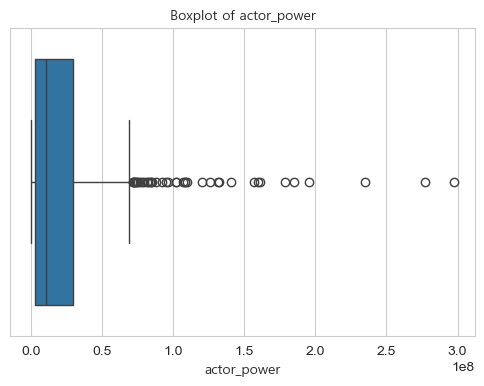

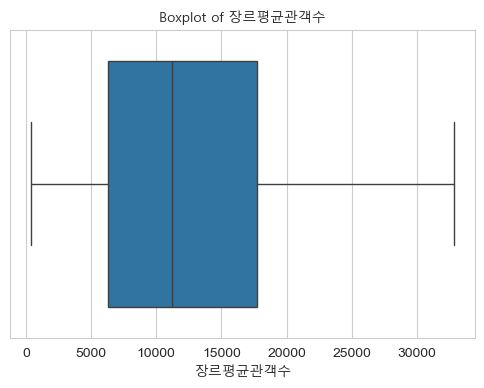

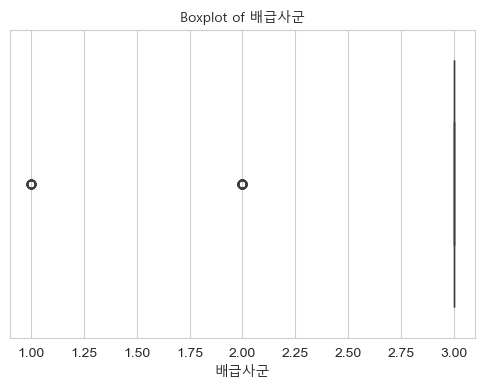

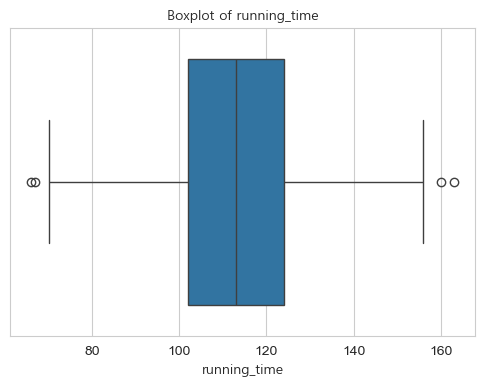

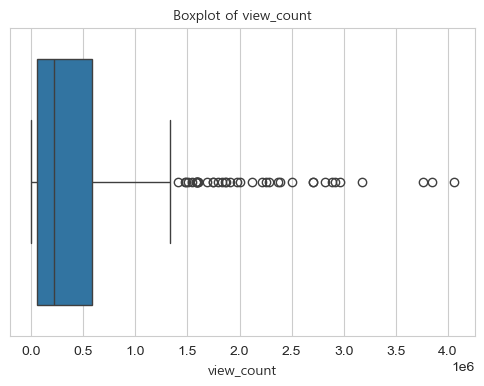

In [14]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}',fontproperties=fontprop)
    plt.xlabel(col,fontproperties=fontprop)
    plt.show()

IQR을 활용한 이상치 탐지

In [15]:
# IQR 기반 이상치 탐지 예시 (view_count 컬럼 사용)
Q1 = df['view_count'].quantile(0.25)
Q3 = df['view_count'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['view_count'] < lower_bound) | (df['view_count'] > upper_bound)]

print("\nIQR기반 이상치 후보 (view_count 기준):")
print(outliers[['view_count']])


IQR기반 이상치 후보 (view_count 기준):
      view_count
195    2373717.0
930    1746720.0
945    2123993.0
1335   2817046.0
1530   2959492.0
1650   2885655.0
2235   1473205.0
2940   1592767.0
3030   1856807.0
3105   1580217.0
3225   1598922.0
3585   2700980.0
3705   2251971.0
3960   1595520.0
4125   1542486.0
4335   2918769.0
4365   1507629.0
4425   2283444.0
4590   2390860.0
4725   3172602.0
4905   1869889.0
4995   1581281.0
5070   1829465.0
5115   1748388.0
5175   1689224.0
5340   4056891.0
5415   1483284.0
5445   2507262.0
5475   1598922.0
5685   3764607.0
5730   1793217.0
5835   1412781.0
5955   1980483.0
5985   3843623.0
6000   2701712.0
6015   1909906.0
6030   2008519.0
6075   2216861.0


# 5. 상관계수

c:\Users\YuHan\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\YuHan\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 46021 (\N{HANGUL SYLLABLE DOG}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\YuHan\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 44400 (\N{HANGUL SYLLABLE GUN}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\YuHan\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\YuHan\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 47476 (\N{HANGUL SYLLABLE REU}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\YuHan\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\YuHan\ana

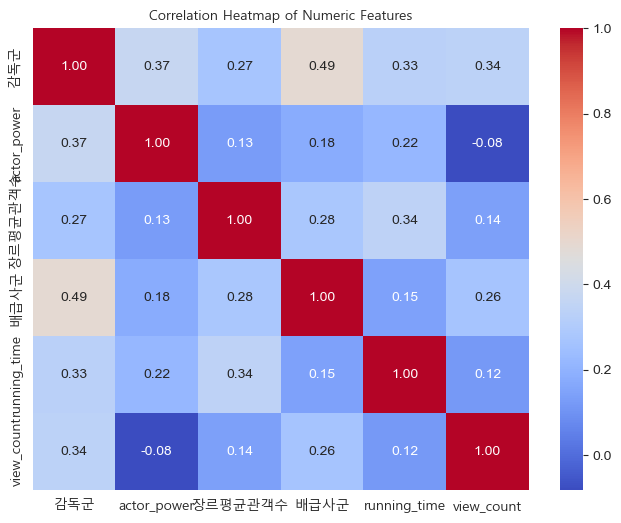

상관계수 행렬:
                   감독군  actor_power   장르평균관객수      배급사군  running_time  \
감독군           1.000000     0.373257  0.269862  0.490267      0.331907   
actor_power   0.373257     1.000000  0.126285  0.177213      0.216331   
장르평균관객수       0.269862     0.126285  1.000000  0.279503      0.340851   
배급사군          0.490267     0.177213  0.279503  1.000000      0.145199   
running_time  0.331907     0.216331  0.340851  0.145199      1.000000   
view_count    0.340314    -0.081914  0.139350  0.264692      0.117874   

              view_count  
감독군             0.340314  
actor_power    -0.081914  
장르평균관객수         0.139350  
배급사군            0.264692  
running_time    0.117874  
view_count      1.000000  


In [16]:
# 상관관계 행렬 계산
corr = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features',fontproperties=fontprop)
plt.xticks(fontproperties=fontprop)
plt.yticks(fontproperties=fontprop) 
plt.show()

print("상관계수 행렬:")
print(corr)


# 6. 다변량 분석(Multivariate Analysis)

수치형 변수에 대해서 pair plot\
hue에 범주형 변수 넣어서 패천 확인

c:\Users\YuHan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) Arial.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\YuHan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 47476 (\N{HANGUL SYLLABLE REU}) missing from font(s) Arial.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\YuHan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) Arial.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\YuHan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) Arial.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\YuHan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) Arial.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\YuHan\anaconda3\Lib\site-

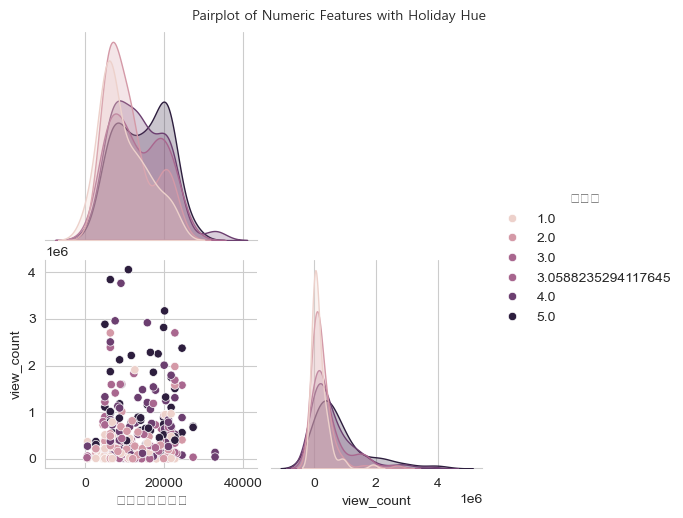

In [17]:
numeric_cols = ['감독군', '장르평균관객수', 'view_count']

sns.pairplot(df[numeric_cols], hue='감독군', corner=True, diag_kind='kde')
plt.suptitle("Pairplot of Numeric Features with Holiday Hue", y=1.02,fontproperties=fontprop)
plt.xticks(fontproperties=fontprop)
plt.yticks(fontproperties=fontprop) 
plt.show()


이거는 그래프 하나씩 보라고 만듬

c:\Users\YuHan\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\YuHan\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 46021 (\N{HANGUL SYLLABLE DOG}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\YuHan\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 44400 (\N{HANGUL SYLLABLE GUN}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\YuHan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\YuHan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46021 (\N{HANGUL SYLLABLE DOG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\YuHan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44400 (\N{HANGUL SYLLABLE

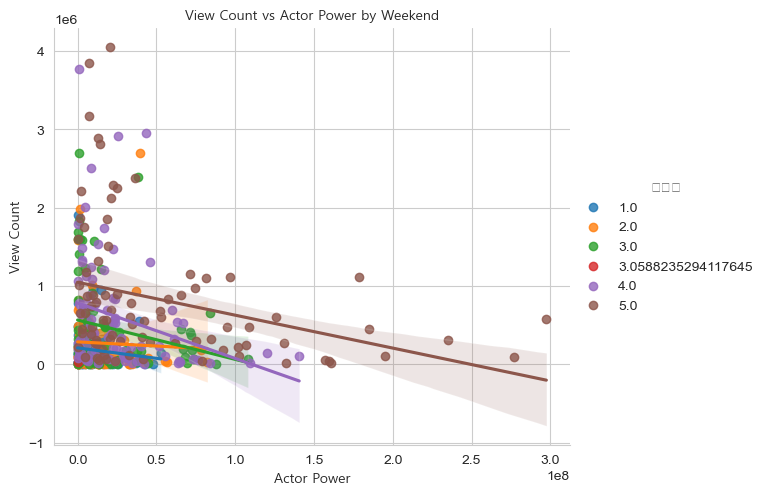

In [18]:
# 주말 개봉 여부(Weekend)에 따라 view_count ~ actor_power 관계 변화 관찰
sns.lmplot(x='actor_power', y='view_count', hue='감독군', data=df, aspect=1.2, height=5)
plt.title("View Count vs Actor Power by Weekend",fontproperties=fontprop)
plt.xlabel('Actor Power',fontproperties=fontprop)
plt.ylabel('View Count',fontproperties=fontprop)
plt.show()

# 시간대별 관객수

In [20]:
all_time_movie = pd.read_excel("./전체_데이터.xlsx")

In [22]:
all_time_movie.head()

,naver_movie_code,kobis_movie_code,movie_title,release_date,DoW_release,Date,DoW,MoY,D_D,DailyTotal,...,등급평균스크린수,7days_before,5days_before,Day_of_release,5days_after,7days_after,salesShare,salesChange,audiChange,스크린 수
0,177371.0,20188144,0.0MHz,2019-05-29,Wednesday,2019-05-29,Wednesday,May,0,350.0,...,79.0,33.0,17.0,8.0,40.0,55.0,NaN,NaN,NaN,NaN
1,177371.0,20188144,0.0MHz,2019-05-29,Wednesday,2019-05-30,Thursday,May,1,271.0,...,79.0,33.0,17.0,8.0,40.0,55.0,NaN,NaN,NaN,NaN
2,177371.0,20188144,0.0MHz,2019-05-29,Wednesday,2019-05-31,Friday,May,2,133.0,...,79.0,33.0,17.0,8.0,40.0,55.0,NaN,NaN,NaN,NaN
3,177371.0,20188144,0.0MHz,2019-05-29,Wednesday,2019-06-01,Saturday,June,3,154.0,...,79.0,33.0,17.0,8.0,40.0,55.0,NaN,NaN,NaN,NaN
4,177371.0,20188144,0.0MHz,2019-05-29,Wednesday,2019-06-02,Sunday,June,4,127.0,...,79.0,33.0,17.0,8.0,40.0,55.0,NaN,NaN,NaN,NaN


In [23]:
# 좌석수와 스크린수의 상관계수
correlation = all_time_movie[['좌석수', '상영횟수']].corr()
print(correlation)


           좌석수      상영횟수
좌석수   1.000000  0.992825
상영횟수  0.992825  1.000000


In [24]:
# 관객수를 상영횟수로 나눈 값을 새로운 컬럼으로 추가
all_time_movie['관객수_상영횟수_비율'] = all_time_movie['관객수'] / all_time_movie['상영횟수']

# 결과 확인
print(all_time_movie[['관객수', '상영횟수', '관객수_상영횟수_비율']].head())

     관객수  상영횟수  관객수_상영횟수_비율
0  31078  1043    29.796740
1  10969   723    15.171508
2  14921   735    20.300680
3  25945   673    38.551263
4  21792   634    34.372240


In [25]:
# D_D 값에 따른 관객수_상영횟수_비율 평균값 계산
dd_audience_ratio_mean = all_time_movie.groupby('D_D')['관객수_상영횟수_비율'].mean()

# 결과 출력
print(dd_audience_ratio_mean)

D_D
0       33.481281
1       26.710255
2       35.743953
3       49.583414
4       40.239669
          ...    
91       8.353448
96      39.529412
97      43.916667
140    203.000000
278     19.226804
Name: 관객수_상영횟수_비율, Length: 96, dtype: float64


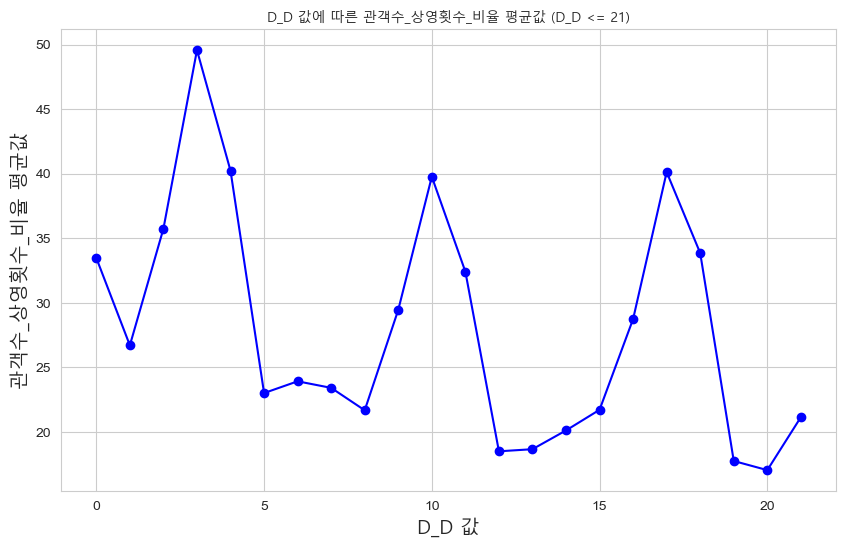

In [26]:
# D_D 값이 21 이하인 데이터만 필터링
dd_audience_ratio_mean_21 = dd_audience_ratio_mean[dd_audience_ratio_mean.index <= 21]

# 라인 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(dd_audience_ratio_mean_21.index, dd_audience_ratio_mean_21.values, marker='o', color='blue')
plt.xlabel('D_D 값', fontsize=14, fontproperties=fontprop)
plt.ylabel('관객수_상영횟수_비율 평균값', fontsize=14, fontproperties=fontprop)
plt.title('D_D 값에 따른 관객수_상영횟수_비율 평균값 (D_D <= 21)', fontsize=16, fontproperties=fontprop)
plt.grid(True)
plt.show()

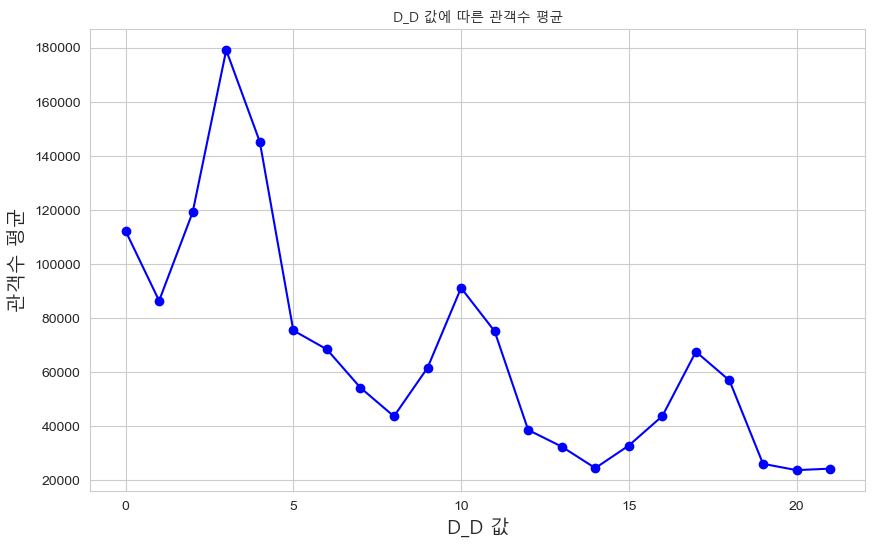

In [27]:
# D_D 값에 따른 관객수 평균 계산
dd_audience_mean = all_time_movie[all_time_movie['D_D'] <= 21].groupby('D_D')['관객수'].mean()

# 라인 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(dd_audience_mean.index, dd_audience_mean.values, marker='o', color='blue')
plt.xlabel('D_D 값', fontsize=14, fontproperties=fontprop)
plt.ylabel('관객수 평균', fontsize=14, fontproperties=fontprop)
plt.title('D_D 값에 따른 관객수 평균', fontsize=16, fontproperties=fontprop)
plt.grid(True)
plt.show()

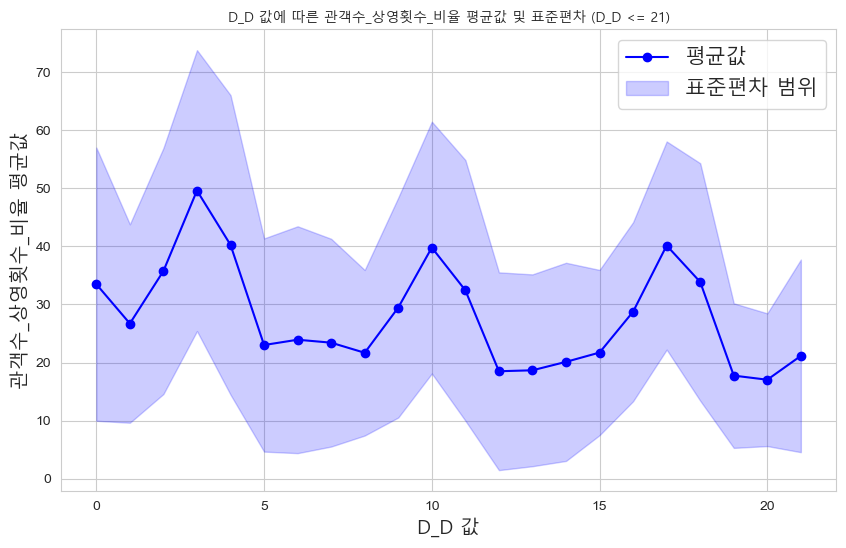

In [28]:
# D_D 값이 21 이하인 데이터만 필터링
dd_audience_ratio_mean_21 = dd_audience_ratio_mean[dd_audience_ratio_mean.index <= 21]

# D_D 값에 따른 관객수_상영횟수_비율 표준편차 계산
dd_audience_ratio_std_21 = all_time_movie[all_time_movie['D_D'] <= 21].groupby('D_D')['관객수_상영횟수_비율'].std()

# 라인 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(dd_audience_ratio_mean_21.index, dd_audience_ratio_mean_21.values, marker='o', color='blue', label='평균값')
plt.fill_between(dd_audience_ratio_mean_21.index, 
                 dd_audience_ratio_mean_21.values - dd_audience_ratio_std_21, 
                 dd_audience_ratio_mean_21.values + dd_audience_ratio_std_21, 
                 color='blue', alpha=0.2, label='표준편차 범위')
plt.xlabel('D_D 값', fontsize=14, fontproperties=fontprop)
plt.ylabel('관객수_상영횟수_비율 평균값', fontsize=14, fontproperties=fontprop)
plt.title('D_D 값에 따른 관객수_상영횟수_비율 평균값 및 표준편차 (D_D <= 21)', fontsize=16, fontproperties=fontprop)
plt.legend(prop={'family': 'Malgun Gothic', 'size': 15})
plt.grid(True)
plt.show()

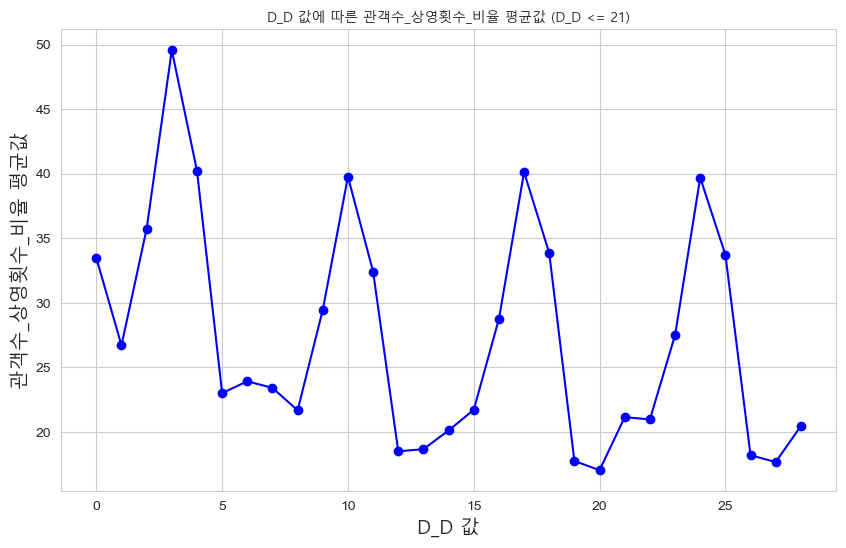

In [29]:
# D_D 값이 21 이하인 데이터만 필터링
dd_audience_ratio_mean_21 = dd_audience_ratio_mean[dd_audience_ratio_mean.index <= 28]

# 라인 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(dd_audience_ratio_mean_21.index, dd_audience_ratio_mean_21.values, marker='o', color='blue')
plt.xlabel('D_D 값', fontsize=14, fontproperties=fontprop)
plt.ylabel('관객수_상영횟수_비율 평균값', fontsize=14, fontproperties=fontprop)
plt.title('D_D 값에 따른 관객수_상영횟수_비율 평균값 (D_D <= 21)', fontsize=16, fontproperties=fontprop)
plt.grid(True)
plt.show()

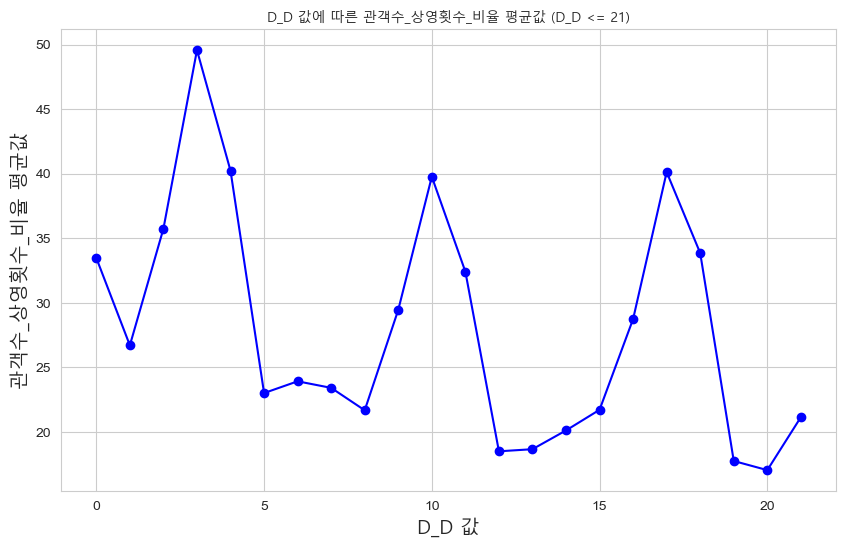

In [30]:
# D_D 값이 21 이하인 데이터만 필터링
dd_audience_ratio_mean_21 = dd_audience_ratio_mean[dd_audience_ratio_mean.index <= 21]

# 라인 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(dd_audience_ratio_mean_21.index, dd_audience_ratio_mean_21.values, marker='o', color='blue')
plt.xlabel('D_D 값', fontsize=14, fontproperties=fontprop)
plt.ylabel('관객수_상영횟수_비율 평균값', fontsize=14, fontproperties=fontprop)
plt.title('D_D 값에 따른 관객수_상영횟수_비율 평균값 (D_D <= 21)', fontsize=16, fontproperties=fontprop)
plt.grid(True)
plt.show()

In [31]:
all_time_movie

,naver_movie_code,kobis_movie_code,movie_title,release_date,DoW_release,Date,DoW,MoY,D_D,DailyTotal,...,7days_before,5days_before,Day_of_release,5days_after,7days_after,salesShare,salesChange,audiChange,스크린 수,관객수_상영횟수_비율
0,177371.0,20188144,0.0MHz,2019-05-29,Wednesday,2019-05-29,Wednesday,May,0,350.0,...,33.0,17.0,8.0,40.0,55.0,NaN,NaN,NaN,NaN,29.796740
1,177371.0,20188144,0.0MHz,2019-05-29,Wednesday,2019-05-30,Thursday,May,1,271.0,...,33.0,17.0,8.0,40.0,55.0,NaN,NaN,NaN,NaN,15.171508
2,177371.0,20188144,0.0MHz,2019-05-29,Wednesday,2019-05-31,Friday,May,2,133.0,...,33.0,17.0,8.0,40.0,55.0,NaN,NaN,NaN,NaN,20.300680
3,177371.0,20188144,0.0MHz,2019-05-29,Wednesday,2019-06-01,Saturday,June,3,154.0,...,33.0,17.0,8.0,40.0,55.0,NaN,NaN,NaN,NaN,38.551263
4,177371.0,20188144,0.0MHz,2019-05-29,Wednesday,2019-06-02,Sunday,June,4,127.0,...,33.0,17.0,8.0,40.0,55.0,NaN,NaN,NaN,NaN,34.372240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9286,NaN,20167363,히든 피겨스,2017-03-23,Thursday,2017-04-21,Friday,April,29,NaN,...,NaN,NaN,NaN,NaN,NaN,1.1,45.0,28.0,116.0,16.635294
9287,NaN,20167363,히든 피겨스,2017-03-23,Thursday,2017-04-22,Saturday,April,30,NaN,...,NaN,NaN,NaN,NaN,NaN,1.1,99.6,92.7,114.0,30.441341
9288,NaN,20167363,히든 피겨스,2017-03-23,Thursday,2017-04-23,Sunday,April,31,NaN,...,NaN,NaN,NaN,NaN,NaN,1.1,-15.4,-15.4,111.0,26.790698
9289,NaN,20167363,히든 피겨스,2017-03-23,Thursday,2017-04-25,Tuesday,April,33,NaN,...,NaN,NaN,NaN,NaN,NaN,1.5,10.5,8.7,116.0,11.601064


In [32]:
# 순위 피쳐 값이 11 이상인 영화와 10 이하인 영화로 분류
movies_rank_above_10 = all_time_movie[all_time_movie['순위'] > 10]
movies_rank_10_or_below = all_time_movie[all_time_movie['순위'] <= 10]

# 결과 확인
print("순위가 11 이상인 영화:")
print(movies_rank_above_10.head())

print("\n순위가 10 이하인 영화:")
print(movies_rank_10_or_below.head())

순위가 11 이상인 영화:
    naver_movie_code  kobis_movie_code movie_title release_date DoW_release  \
8           177371.0          20188144      0.0MHz   2019-05-29   Wednesday   
12          177371.0          20188144      0.0MHz   2019-05-29   Wednesday   
13          177371.0          20188144      0.0MHz   2019-05-29   Wednesday   
14          177371.0          20188144      0.0MHz   2019-05-29   Wednesday   
29          168037.0          20178395      12 솔져스   2018-01-31   Wednesday   

         Date        DoW       MoY  D_D  DailyTotal  ...  7days_before  \
8  2019-06-06   Thursday      June    8        43.0  ...          33.0   
12 2019-06-10     Monday      June   12         8.0  ...          33.0   
13 2019-06-11    Tuesday      June   13        50.0  ...          33.0   
14 2019-06-12  Wednesday      June   14        86.0  ...          33.0   
29 2018-02-14  Wednesday  February   14         5.0  ...          43.0   

    5days_before  Day_of_release  5days_after  7days_after  sales

In [33]:
# 두 그룹의 관객수 피쳐에 대한 기술 통계량 확인
print("순위가 10 이하인 영화의 관객수 기술 통계량:")
print(movies_rank_10_or_below['관객수'].describe())

print("\n순위가 11 이상인 영화의 관객수 기술 통계량:")
print(movies_rank_above_10['관객수'].describe())

순위가 10 이하인 영화의 관객수 기술 통계량:
count    8.658000e+03
mean     6.887968e+04
std      1.162355e+05
min      5.290000e+02
25%      8.984250e+03
50%      2.519300e+04
75%      7.660175e+04
max      1.282013e+06
Name: 관객수, dtype: float64

순위가 11 이상인 영화의 관객수 기술 통계량:
count      633.000000
mean      2329.897314
std       2377.674418
min          9.000000
25%        664.000000
50%       1521.000000
75%       3127.000000
max      14763.000000
Name: 관객수, dtype: float64


count    1.600000e+03
mean     4.157030e+04
std      6.921095e+04
min      8.210000e+02
25%      5.978750e+03
50%      1.700250e+04
75%      4.979200e+04
max      1.131697e+06
Name: 관객수, dtype: float64


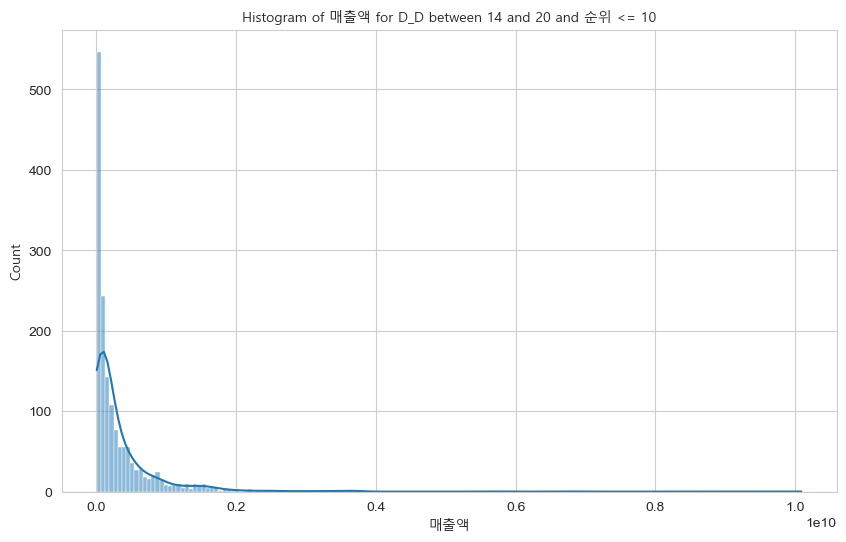

In [34]:
# D_D 값이 14 이상이고 20 이하이며 순위 값이 10 이하인 행들 필터링
filtered_df = all_time_movie[(all_time_movie['D_D'] >= 14) & (all_time_movie['D_D'] <= 20) & (all_time_movie['순위'] <= 10)]

# 필터링된 데이터프레임의 통계 요약 출력
print(filtered_df['관객수'].describe())

# 매출액 히스토그램 그리기
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['매출액'], kde=True)
plt.title('Histogram of 매출액 for D_D between 14 and 20 and 순위 <= 10', fontproperties=fontprop)
plt.xlabel('매출액', fontproperties=fontprop)
plt.ylabel('Count', fontproperties=fontprop)
plt.show()

In [35]:
# D_D 값이 14 이상이고 20 이하이며 순위 값이 10 이하인 행들 필터링
filtered_df = all_time_movie[(all_time_movie['D_D'] >= 7) & (all_time_movie['D_D'] <= 13) & (all_time_movie['순위'] <= 10)]

# 필터링된 데이터프레임의 통계 요약 출력
print(filtered_df['관객수'].describe())

count    2.412000e+03
mean     6.675945e+04
std      1.086984e+05
min      6.930000e+02
25%      9.409000e+03
50%      2.558200e+04
75%      7.673925e+04
max      1.130176e+06
Name: 관객수, dtype: float64


In [37]:
movie_revenue = pd.read_excel("./kofic_data/KOBIS_총_관객수_및_매출액_연도별_2024-12-12.xlsx")

In [38]:
movie_revenue

,연도,개봉편수,상영편수,매출액,관객수,점유율,개봉편수.1,상영편수.1,매출액.1,관객수.1,점유율(전체),개봉편수(전체),상영편수(전체),매출액(전체),관객수(전체)
0,2004,74,95,239142696406,37741344,0.545,206,205,201490940300,31496364,0.455,280,300,440633636706,69237708
1,2005,82,116,451514376294,71316778,0.578,224,298,328510859673,51983923,0.422,306,414,780025235967,123300701
2,2006,110,159,567789548700,91694260,0.636,241,323,324250250300,52493244,0.364,351,482,892039799000,144187504
3,2007,111,183,479733501900,75768678,0.499,282,428,485511362138,76212005,0.501,393,611,965244864038,151980683
4,2008,110,252,407325412301,62047028,0.421,270,553,554121877950,85380593,0.579,380,805,961447290251,147427621
5,2009,119,210,526482690000,75644938,0.487,243,503,556706710450,79752686,0.513,362,713,1083189400450,155397624
6,2010,142,275,508431622550,68844023,0.466,288,521,648827765500,78915821,0.534,430,796,1157259388050,147759844
7,2011,152,334,613734577100,82870108,0.519,290,611,622086015100,76857701,0.481,442,945,1235820592200,159727809
8,2012,176,388,838231476234,114908326,0.590,465,846,616909416201,79982317,0.410,641,1234,1455140892435,194890643
9,2013,183,490,909926954105,127290242,0.597,724,1186,641420351616,86060165,0.403,907,1676,1551347305721,213350407


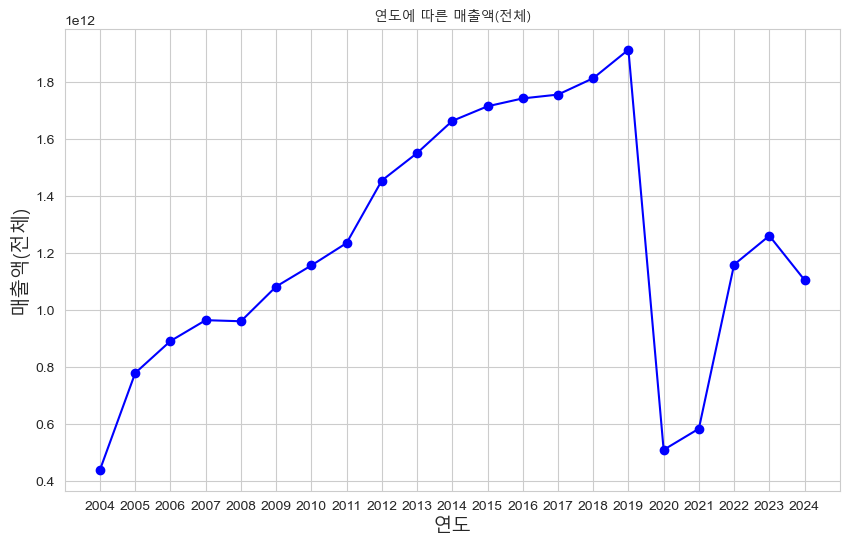

In [39]:
# 연도와 매출액(전체) 컬럼 선택
revenue_data = movie_revenue[['연도', '매출액(전체)']].dropna()

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(revenue_data['연도'], revenue_data['매출액(전체)'], marker='o', color='blue')
plt.xlabel('연도', fontsize=14, fontproperties=fontprop)
# x축 눈금을 정수로 설정
plt.xticks(ticks=revenue_data['연도'], labels=revenue_data['연도'].astype(int))
plt.ylabel('매출액(전체)', fontsize=14, fontproperties=fontprop)
plt.title('연도에 따른 매출액(전체)', fontsize=16, fontproperties=fontprop)
plt.grid(True)
plt.show()

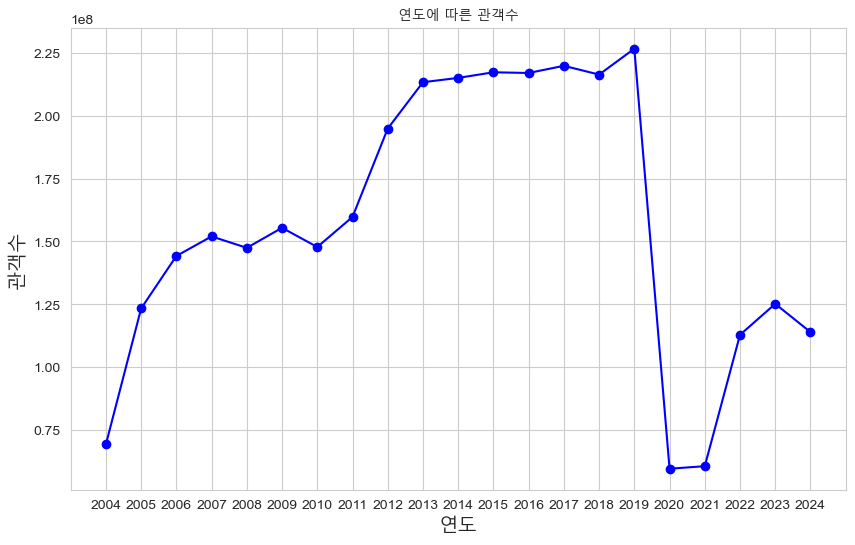

In [40]:
# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(movie_revenue['연도'], movie_revenue['관객수(전체)'], marker='o', color='blue')

# x축 눈금을 정수로 설정
plt.xticks(ticks=movie_revenue['연도'], labels=movie_revenue['연도'].astype(int))

plt.xlabel('연도', fontsize=14, fontproperties=fontprop)
plt.ylabel('관객수', fontsize=14, fontproperties=fontprop)
plt.title('연도에 따른 관객수', fontsize=16, fontproperties=fontprop)
plt.grid(True)
plt.show()


In [41]:
# D_D 값이 14 이상이고 20 이하인 데이터만 필터링
filtered_movies = all_time_movie[(all_time_movie['D_D'] >= 14) & (all_time_movie['D_D'] <= 20)]

# 결과 확인
print(filtered_movies)
# 영화명 리스트 추출
movie_titles = filtered_movies['movie_title'].unique()

# 3_week_movie 변수에 해당 영화 전체 데이터 저장
three_week_movie = all_time_movie[all_time_movie['movie_title'].isin(movie_titles)]

# 결과 확인
print(three_week_movie)

      naver_movie_code  kobis_movie_code movie_title release_date DoW_release  \
14            177371.0          20188144      0.0MHz   2019-05-29   Wednesday   
29            168037.0          20178395      12 솔져스   2018-01-31   Wednesday   
44            158191.0          20170590        1987   2017-12-27   Wednesday   
45                 NaN          20170590        1987   2017-12-27   Wednesday   
46                 NaN          20170590        1987   2017-12-27   Wednesday   
...                ...               ...         ...          ...         ...   
9274               NaN          20167363      히든 피겨스   2017-03-23    Thursday   
9275               NaN          20167363      히든 피겨스   2017-03-23    Thursday   
9276               NaN          20167363      히든 피겨스   2017-03-23    Thursday   
9277               NaN          20167363      히든 피겨스   2017-03-23    Thursday   
9278               NaN          20167363      히든 피겨스   2017-03-23    Thursday   

           Date        DoW 

      naver_movie_code  kobis_movie_code movie_title release_date DoW_release  \
0             177371.0          20188144      0.0MHz   2019-05-29   Wednesday   
1             177371.0          20188144      0.0MHz   2019-05-29   Wednesday   
2             177371.0          20188144      0.0MHz   2019-05-29   Wednesday   
3             177371.0          20188144      0.0MHz   2019-05-29   Wednesday   
4             177371.0          20188144      0.0MHz   2019-05-29   Wednesday   
...                ...               ...         ...          ...         ...   
9274               NaN          20167363      히든 피겨스   2017-03-23    Thursday   
9275               NaN          20167363      히든 피겨스   2017-03-23    Thursday   
9276               NaN          20167363      히든 피겨스   2017-03-23    Thursday   
9277               NaN          20167363      히든 피겨스   2017-03-23    Thursday   
9278               NaN          20167363      히든 피겨스   2017-03-23    Thursday   

           Date        DoW 

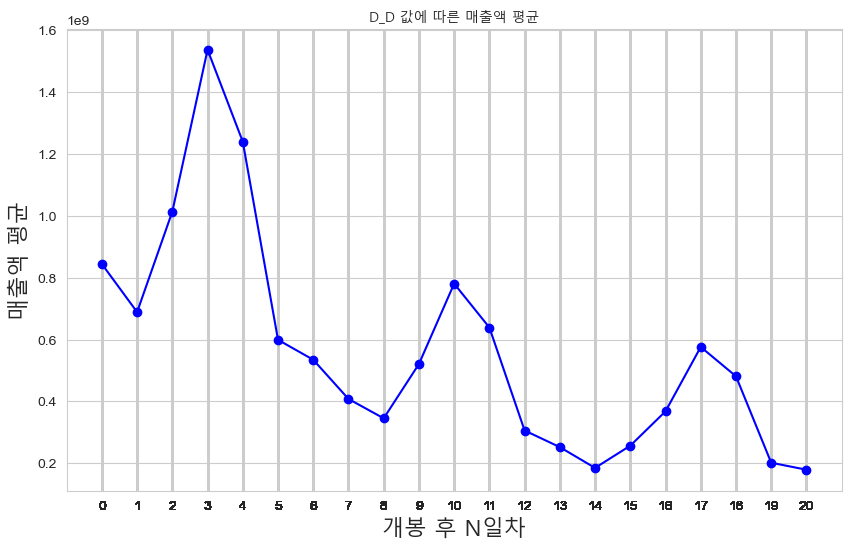

In [42]:
# D_D 값이 21 이하인 데이터만 필터링
three_week_movie = three_week_movie[three_week_movie['D_D'] <= 20]

# 결과 확인
print(three_week_movie)
# D_D 값에 따른 관객수 평균 계산
dd_audience_mean = three_week_movie.groupby('D_D')['매출액'].mean()

# 라인 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(dd_audience_mean.index, dd_audience_mean.values, marker='o', linestyle='-', color='blue')
plt.xlabel('개봉 후 N일차', fontsize=16, fontproperties=fontprop)
plt.xticks(ticks=three_week_movie['D_D'], labels=three_week_movie['D_D'].astype(int))
plt.ylabel('매출액 평균', fontsize=16, fontproperties=fontprop)
plt.title('D_D 값에 따른 매출액 평균', fontsize=24, fontproperties=fontprop)
plt.grid(True)
plt.show()

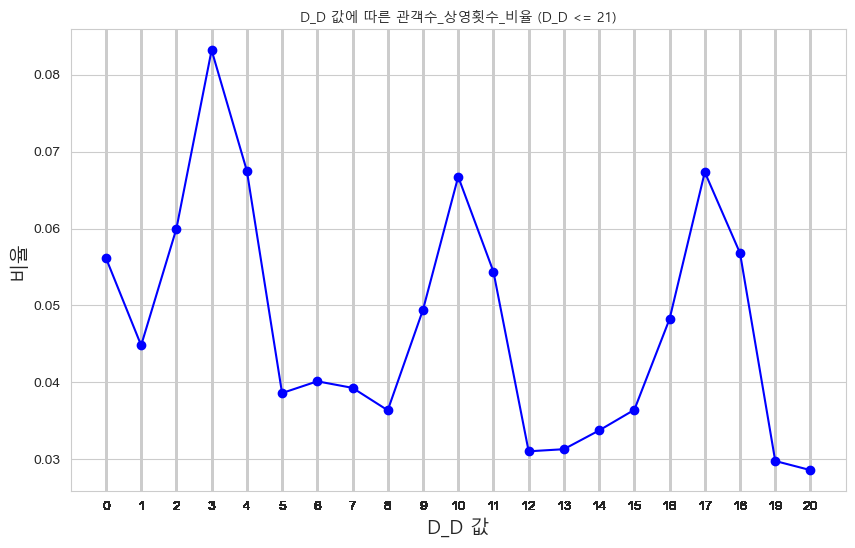

비율 값:
D_D
0     0.056179
1     0.044818
2     0.059975
3     0.083197
4     0.067519
5     0.038613
6     0.040142
7     0.039290
8     0.036374
9     0.049433
10    0.066740
11    0.054400
12    0.031042
13    0.031316
14    0.033756
15    0.036439
16    0.048242
17    0.067336
18    0.056810
19    0.029782
20    0.028595
Name: 관객수_상영횟수_비율, dtype: float64


In [43]:
# D_D 값이 21 이하인 데이터만 필터링
dd_audience_ratio_mean_21 = dd_audience_ratio_mean[dd_audience_ratio_mean.index <= 20]

# 비율 계산
ratio = dd_audience_ratio_mean_21 / dd_audience_ratio_mean_21.sum()

# 라인 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(dd_audience_ratio_mean_21.index, ratio.values, marker='o', color='blue')
plt.xlabel('D_D 값', fontsize=14, fontproperties=fontprop)
plt.xticks(ticks=three_week_movie['D_D'], labels=three_week_movie['D_D'].astype(int))

plt.ylabel('비율', fontsize=14, fontproperties=fontprop)
plt.title('D_D 값에 따른 관객수_상영횟수_비율 (D_D <= 21)', fontsize=16, fontproperties=fontprop)
plt.grid(True)
plt.show()

# 비율 값 출력
print("비율 값:")
print(ratio)

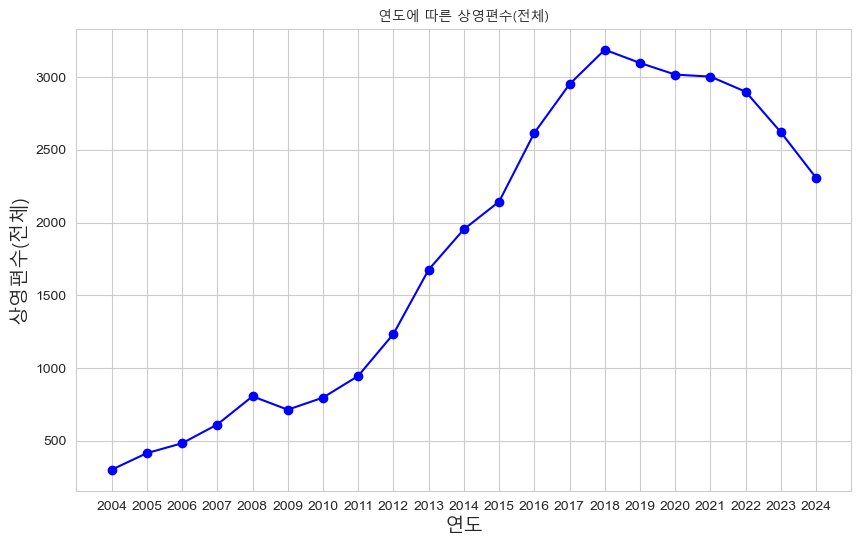

In [44]:
# 연도와 상영편수(전체) 컬럼 선택
screening_data = movie_revenue[['연도', '상영편수(전체)']].dropna()

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(screening_data['연도'], screening_data['상영편수(전체)'], marker='o', color='blue')
plt.xlabel('연도', fontsize=14, fontproperties=fontprop)
# x축 눈금을 정수로 설정
plt.xticks(ticks=screening_data['연도'], labels=screening_data['연도'].astype(int))
plt.ylabel('상영편수(전체)', fontsize=14, fontproperties=fontprop)
plt.title('연도에 따른 상영편수(전체)', fontsize=16, fontproperties=fontprop)
plt.grid(True)
plt.show()

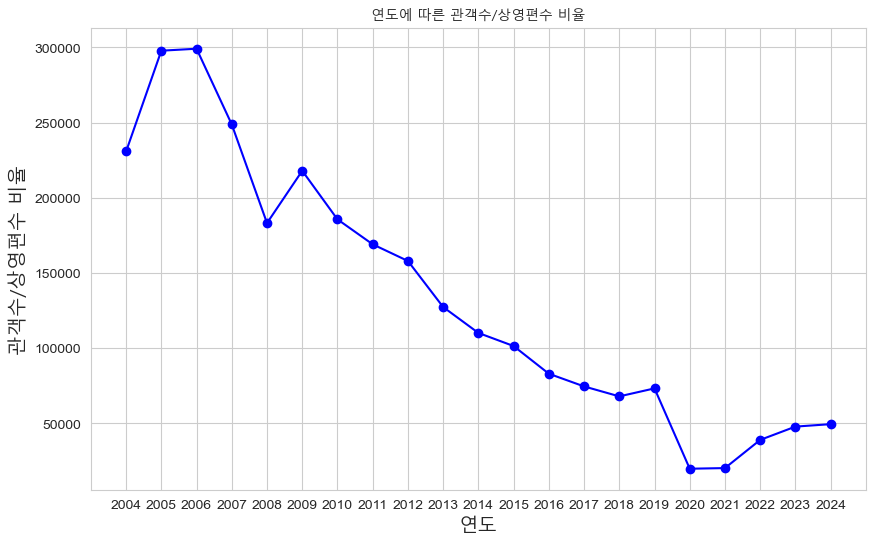

In [45]:
# 관객수/상영편수 비율 계산
movie_revenue['관객수_상영편수_비율'] = movie_revenue['관객수(전체)'] / movie_revenue['상영편수(전체)']

# 연도와 관객수/상영편수 비율 컬럼 선택
audience_ratio_data = movie_revenue[['연도', '관객수_상영편수_비율']].dropna()

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(audience_ratio_data['연도'], audience_ratio_data['관객수_상영편수_비율'], marker='o', color='blue')
plt.xlabel('연도', fontsize=14, fontproperties=fontprop)
# x축 눈금을 정수로 설정
plt.xticks(ticks=audience_ratio_data['연도'], labels=audience_ratio_data['연도'].astype(int))
plt.ylabel('관객수/상영편수 비율', fontsize=14, fontproperties=fontprop)
plt.title('연도에 따른 관객수/상영편수 비율', fontsize=16, fontproperties=fontprop)
plt.grid(True)
plt.show()